# COGS 108 - Final Project

## Introduction and Background




In [3]:
# Imports for data
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import patsy
# import statsmodels.api as sm
# import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

## Data

### Description (Dataset 1)
Link: https://catalog.data.gov/dataset/crime-data-from-2010-to-present

Description: Number of crimes in Los Angeles, California starting from 2010
Source: data.lacity.org

In [4]:
df = pd.read_csv('Crime_Data_from_2010_to_Present.csv')
cols = ['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred', 'Area ID', 'Area Name', 'Reporting District', 'Crime Code', 'Crime Code Description', 'Location ']
df = df[cols]
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,Location
0,11401303,09/13/2010,09/12/2010,45,14,Pacific,1485,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(33.9599, -118.3962)"
1,70309629,08/09/2010,08/09/2010,1515,13,Newton,1324,946,OTHER MISCELLANEOUS CRIME,"(34.0224, -118.2524)"
2,100100508,01/08/2010,01/07/2010,2005,1,Central,182,330,BURGLARY FROM VEHICLE,"(34.0389, -118.2643)"
3,100100511,01/09/2010,01/06/2010,2100,1,Central,132,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0538, -118.2488)"
4,100100523,01/15/2010,01/15/2010,245,1,Central,182,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...","(34.0409, -118.2609)"
5,100100552,01/23/2010,01/23/2010,1225,1,Central,192,237,CHILD NEGLECT (SEE 300 W.I.C.),"(34.0401, -118.2668)"
6,100100562,01/28/2010,01/28/2010,2345,1,Central,152,626,INTIMATE PARTNER - SIMPLE ASSAULT,"(34.0502, -118.254)"
7,100100575,02/01/2010,01/31/2010,1720,1,Central,181,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0437, -118.2652)"
8,100100610,02/11/2010,02/10/2010,1800,1,Central,162,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),"(34.048, -118.2577)"
9,100100616,02/11/2010,02/11/2010,1515,1,Central,192,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...","(34.0389, -118.2643)"


In [5]:
dates = {}

def groupby_year():
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        year = date_occurred[-4:]

        if year in dates:
            dates[year].append(row)
        else:
            dates[year] = [row]

groupby_year()

In [6]:
def groupby_month(df):
    months = {}
    # iterate over rows with iterrows()
    for index, row in df.iterrows():
        
        # Drop all whitespace
        date_occurred = row['Date Occurred'].strip()

        # Extract year
        month = date_occurred[:2]

        if month in months:
            months[month].append(row)
        else:
            months[month] = [row]
    return months

#### Crimes in 2015

In [7]:
crimes_2015_year = pd.DataFrame(data=dates['2015'])
crimes_2015_months = {}

# year 2015
crimes_2015_months = groupby_month(crimes_2015_year)
crimes_2015_01 = pd.DataFrame(data=(crimes_2015_months['01']))
crimes_2015_02 = pd.DataFrame(data=(crimes_2015_months['02']))
crimes_2015_03 = pd.DataFrame(data=(crimes_2015_months['03']))
crimes_2015_04 = pd.DataFrame(data=(crimes_2015_months['04']))
crimes_2015_05 = pd.DataFrame(data=(crimes_2015_months['05']))
crimes_2015_06 = pd.DataFrame(data=(crimes_2015_months['06']))
crimes_2015_07 = pd.DataFrame(data=(crimes_2015_months['07']))
crimes_2015_08 = pd.DataFrame(data=(crimes_2015_months['08']))
crimes_2015_09 = pd.DataFrame(data=(crimes_2015_months['09']))
crimes_2015_10 = pd.DataFrame(data=(crimes_2015_months['10']))
crimes_2015_11 = pd.DataFrame(data=(crimes_2015_months['11']))
crimes_2015_12 = pd.DataFrame(data=(crimes_2015_months['12']))

In [8]:
Holi_2015 = ["01/01/2015", "01/19/2015", "02/16/2015", "03/25/2015", "07/04/2015", "09/07/2015", "10/12/2015", 
        "11/11/2015", "11/26/2015", "12/25/2015"]

print ("Total crimes for all holidays in 2015: ")
print((crimes_2015_year.loc[crimes_2015_year['Date Occurred'].isin(Holi_2015)])["Crime Code Description"].value_counts()[:10])

Total crimes for all holidays in 2015: 
THEFT OF IDENTITY                    726
BATTERY - SIMPLE ASSAULT             475
INTIMATE PARTNER - SIMPLE ASSAULT    430
VEHICLE - STOLEN                     414
BURGLARY FROM VEHICLE                363
Name: Crime Code Description, dtype: int64


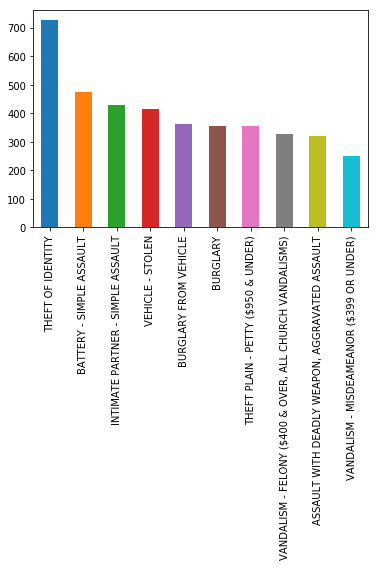

In [10]:
(crimes_2015_year.loc[crimes_2015_year['Date Occurred'].isin(Holi_2015)])["Crime Code Description"].value_counts()[:10].plot(kind='bar')

In [8]:
for i in Holi_2015:
    print ("Top crimes for", i)
    print((crimes_2015_year.loc[crimes_2015_year['Date Occurred'] == i])["Crime Code Description"].value_counts()[:5])
    print("\n")

Top crimes for 01/01/2015
THEFT OF IDENTITY                                           498
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     70
BATTERY - SIMPLE ASSAULT                                     65
INTIMATE PARTNER - SIMPLE ASSAULT                            53
BURGLARY                                                     51
Name: Crime Code Description, dtype: int64


Top crimes for 01/19/2015
BURGLARY FROM VEHICLE                                      47
VEHICLE - STOLEN                                           44
INTIMATE PARTNER - SIMPLE ASSAULT                          42
BATTERY - SIMPLE ASSAULT                                   36
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    31
Name: Crime Code Description, dtype: int64


Top crimes for 02/16/2015
BATTERY - SIMPLE ASSAULT                    52
BURGLARY FROM VEHICLE                       43
VANDALISM - MISDEAMEANOR ($399 OR UNDER)    39
VEHICLE - STOLEN                            39
THEFT PLAIN - 

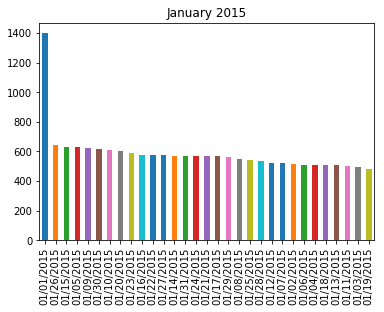

In [9]:
crimes_2015_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2015')

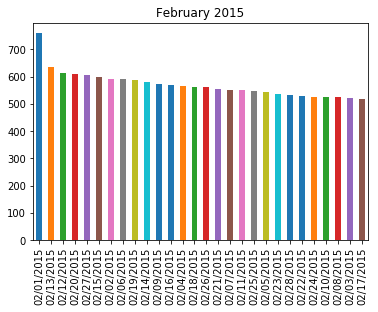

In [10]:
crimes_2015_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2015')

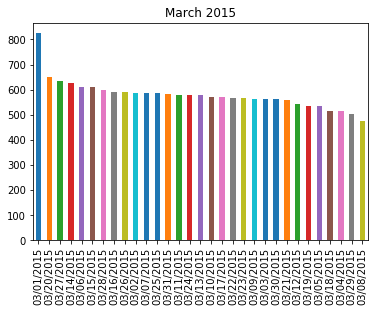

In [11]:
crimes_2015_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2015')

In [12]:
print ("Top 3 crimes for 02/16/15: ")
print((crimes_2015_02.loc[crimes_2015_02['Date Occurred'] == "02/16/2015"])["Crime Code Description"].value_counts()[:5])

Top 3 crimes for 02/16/15: 
BATTERY - SIMPLE ASSAULT                    52
BURGLARY FROM VEHICLE                       43
VANDALISM - MISDEAMEANOR ($399 OR UNDER)    39
VEHICLE - STOLEN                            39
THEFT PLAIN - PETTY ($950 & UNDER)          36
Name: Crime Code Description, dtype: int64


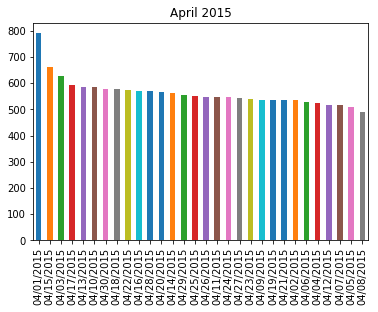

In [13]:
crimes_2015_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2015')

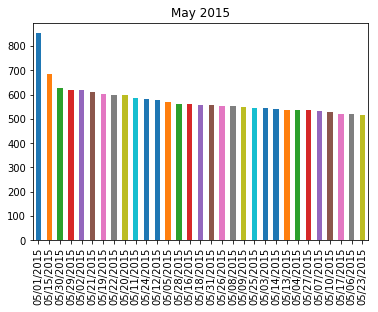

In [14]:
crimes_2015_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2015')

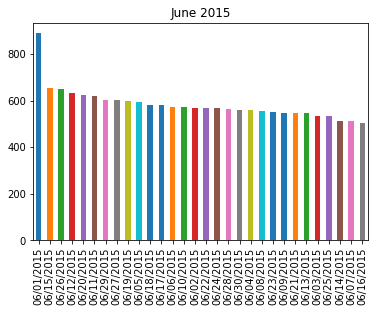

In [15]:
crimes_2015_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2015')

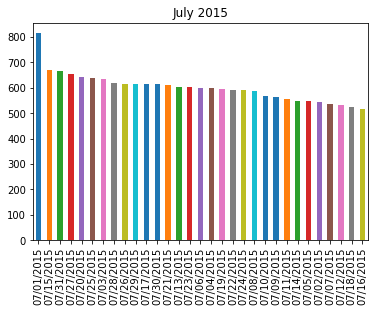

In [16]:
crimes_2015_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2015')

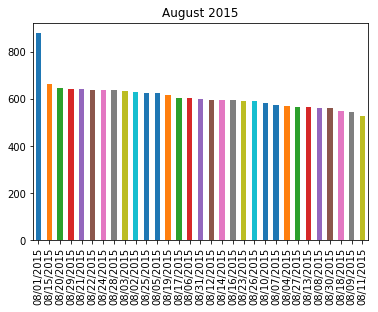

In [17]:
crimes_2015_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2015')

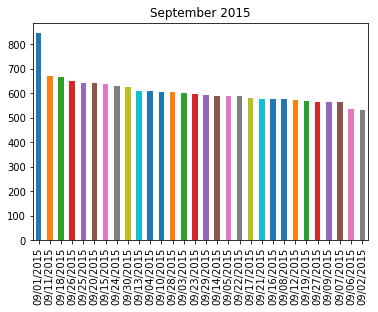

In [18]:
crimes_2015_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2015')

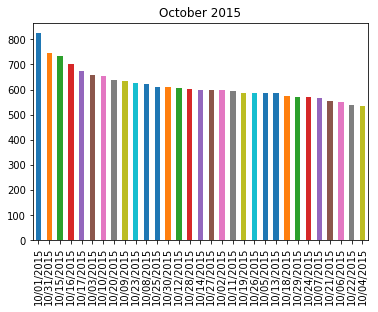

In [11]:
crimes_2015_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2015')

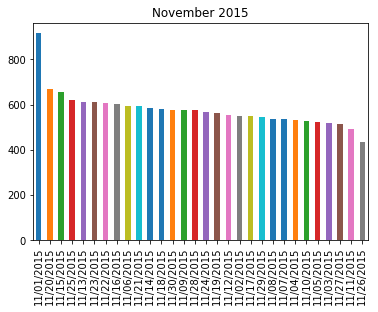

In [12]:
crimes_2015_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2015')

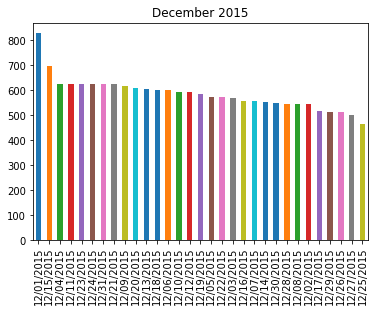

In [13]:
crimes_2015_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2015')

#### Crimes in 2016

In [14]:
crimes_2016_year = pd.DataFrame(data=dates['2016'])
crimes_2016_months = {}

# year 2016
crimes_2016_months = groupby_month(crimes_2016_year)
crimes_2016_01 = pd.DataFrame(data=(crimes_2016_months['01']))
crimes_2016_02 = pd.DataFrame(data=(crimes_2016_months['02']))
crimes_2016_03 = pd.DataFrame(data=(crimes_2016_months['03']))
crimes_2016_04 = pd.DataFrame(data=(crimes_2016_months['04']))
crimes_2016_05 = pd.DataFrame(data=(crimes_2016_months['05']))
crimes_2016_06 = pd.DataFrame(data=(crimes_2016_months['06']))
crimes_2016_07 = pd.DataFrame(data=(crimes_2016_months['07']))
crimes_2016_08 = pd.DataFrame(data=(crimes_2016_months['08']))
crimes_2016_09 = pd.DataFrame(data=(crimes_2016_months['09']))
crimes_2016_10 = pd.DataFrame(data=(crimes_2016_months['10']))
crimes_2016_11 = pd.DataFrame(data=(crimes_2016_months['11']))
crimes_2016_12 = pd.DataFrame(data=(crimes_2016_months['12']))

In [15]:
Holi_2016 = ["01/01/2016", "01/18/2016", "02/15/2016", "03/30/2016", "07/04/2016", "09/05/2016", "10/10/2016", 
        "11/11/2016", "11/24/2016", "12/25/2016"]

print ("Total crimes for all holidays in 2015: ")
print((crimes_2016_year.loc[crimes_2016_year['Date Occurred'].isin(Holi_2016)])["Crime Code Description"].value_counts()[:5])

Total crimes for all holidays in 2015: 
THEFT OF IDENTITY                    603
BATTERY - SIMPLE ASSAULT             533
VEHICLE - STOLEN                     482
BURGLARY FROM VEHICLE                440
INTIMATE PARTNER - SIMPLE ASSAULT    407
Name: Crime Code Description, dtype: int64


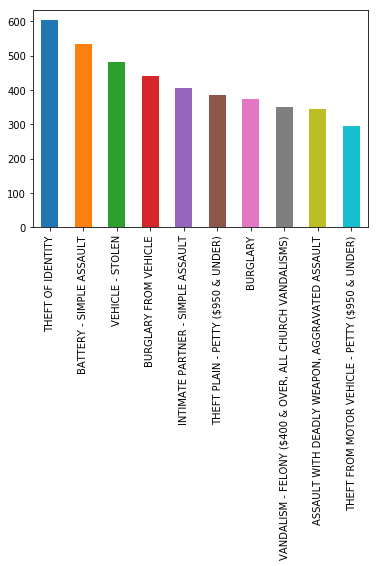

In [16]:
(crimes_2016_year.loc[crimes_2016_year['Date Occurred'].isin(Holi_2016)])["Crime Code Description"].value_counts()[:10].plot(kind='bar')

In [17]:
for i in Holi_2016:
    print ("Top crimes for", i)
    print((crimes_2016_year.loc[crimes_2016_year['Date Occurred'] == i])["Crime Code Description"].value_counts()[:5])
    print("\n")

Top crimes for 01/01/2016
THEFT OF IDENTITY                                           377
BATTERY - SIMPLE ASSAULT                                     76
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     64
INTIMATE PARTNER - SIMPLE ASSAULT                            59
BURGLARY                                                     54
Name: Crime Code Description, dtype: int64


Top crimes for 01/18/2016
VEHICLE - STOLEN                            58
BATTERY - SIMPLE ASSAULT                    54
BURGLARY FROM VEHICLE                       45
THEFT PLAIN - PETTY ($950 & UNDER)          38
VANDALISM - MISDEAMEANOR ($399 OR UNDER)    32
Name: Crime Code Description, dtype: int64


Top crimes for 02/15/2016
BATTERY - SIMPLE ASSAULT              53
INTIMATE PARTNER - SIMPLE ASSAULT     41
VEHICLE - STOLEN                      40
THEFT PLAIN - PETTY ($950 & UNDER)    37
BURGLARY FROM VEHICLE                 34
Name: Crime Code Description, dtype: int64


Top crimes for 03/30/2016
T

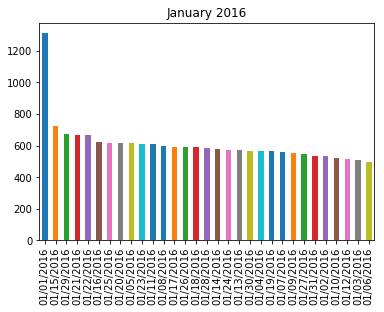

In [18]:
crimes_2016_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2016')

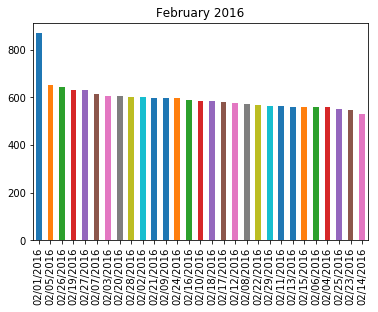

In [19]:
crimes_2016_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2016')

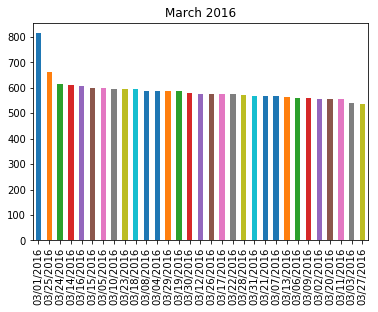

In [20]:
crimes_2016_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2016')

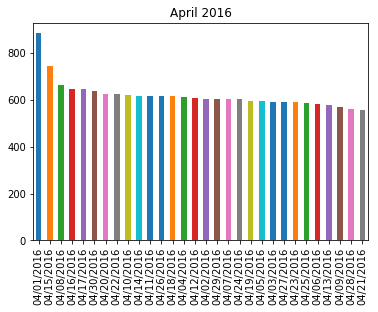

In [21]:
crimes_2016_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2016')

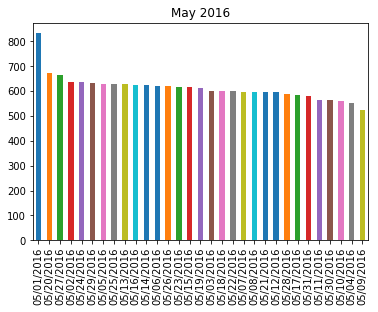

In [22]:
crimes_2016_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2016')

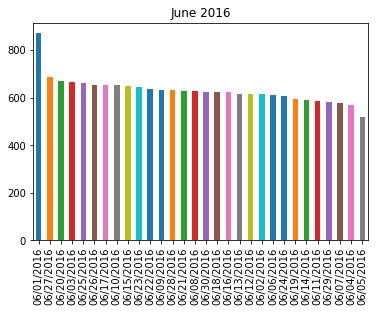

In [23]:
crimes_2016_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2016')

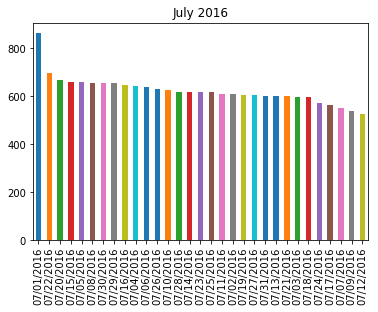

In [24]:
crimes_2016_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2016')

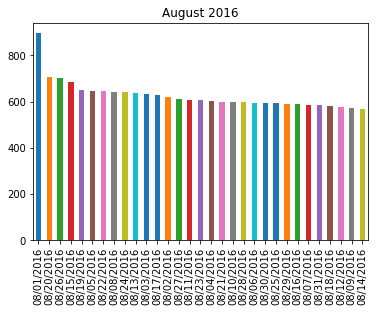

In [25]:
crimes_2016_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2016')

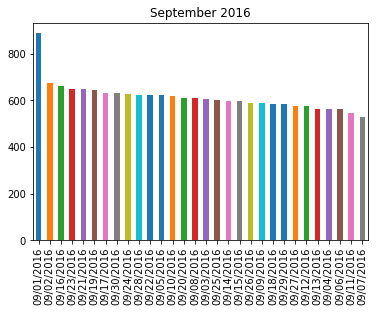

In [26]:
crimes_2016_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2016')

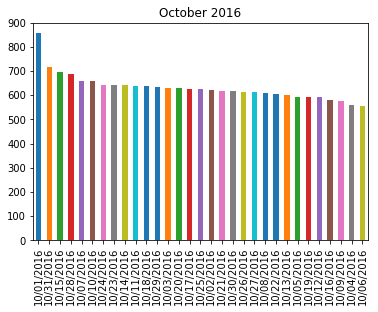

In [27]:
crimes_2016_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2016')

In [2]:
crimes_2016_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2016')

NameError: name 'crimes_2016_11' is not defined

In [ ]:
crimes_2016_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2016')

#### Crimes in 2017

In [ ]:
crimes_2017_year = pd.DataFrame(data=dates['2017'])
crimes_2017_months = {}

# year 2017
crimes_2017_months = groupby_month(crimes_2017_year)
crimes_2017_01 = pd.DataFrame(data=(crimes_2017_months['01']))
crimes_2017_02 = pd.DataFrame(data=(crimes_2017_months['02']))
crimes_2017_03 = pd.DataFrame(data=(crimes_2017_months['03']))
crimes_2017_04 = pd.DataFrame(data=(crimes_2017_months['04']))
crimes_2017_05 = pd.DataFrame(data=(crimes_2017_months['05']))
crimes_2017_06 = pd.DataFrame(data=(crimes_2017_months['06']))
crimes_2017_07 = pd.DataFrame(data=(crimes_2017_months['07']))
crimes_2017_08 = pd.DataFrame(data=(crimes_2017_months['08']))
crimes_2017_09 = pd.DataFrame(data=(crimes_2017_months['09']))
crimes_2017_10 = pd.DataFrame(data=(crimes_2017_months['10']))
crimes_2017_11 = pd.DataFrame(data=(crimes_2017_months['11']))
crimes_2017_12 = pd.DataFrame(data=(crimes_2017_months['12']))

In [ ]:
Holi_2017 = ["01/01/2017", "01/16/2017", "02/20/2017", "03/29/2017", "07/04/2017", "09/04/2017", "10/09/2017", 
        "11/11/2017", "11/23/2017", "12/25/2017"]

print ("Total crimes for all holidays in 2017: ")
print((crimes_2017_year.loc[crimes_2017_year['Date Occurred'].isin(Holi_2017)])["Crime Code Description"].value_counts()[:5])

In [ ]:
(crimes_2017_year.loc[crimes_2017_year['Date Occurred'].isin(Holi_2017)])["Crime Code Description"].value_counts()[:10].plot(kind='bar')

In [ ]:
for i in Holi_2017:
    print ("Top crimes for", i)
    print((crimes_2017_year.loc[crimes_2017_year['Date Occurred'] == i])["Crime Code Description"].value_counts()[:5])
    print("\n")

In [ ]:
crimes_2017_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2017')

In [ ]:
crimes_2017_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2017')

In [ ]:
crimes_2017_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2017')

In [ ]:
crimes_2017_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2017')

In [ ]:
crimes_2017_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2017')

In [ ]:
crimes_2017_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2017')

In [ ]:
crimes_2017_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2017')

In [ ]:
crimes_2017_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2017')

In [ ]:
crimes_2017_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2017')

In [ ]:
crimes_2017_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2017')

In [3]:
crimes_2017_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2017')

NameError: name 'crimes_2017_11' is not defined

In [ ]:
crimes_2017_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2017')

#### Crimes in 2018

In [ ]:
crimes_2018_year = pd.DataFrame(data=dates['2018'])
crimes_2018_months = {}

# year 2018
crimes_2018_months = groupby_month(crimes_2018_year)
crimes_2018_01 = pd.DataFrame(data=(crimes_2018_months['01']))
crimes_2018_02 = pd.DataFrame(data=(crimes_2018_months['02']))
crimes_2018_03 = pd.DataFrame(data=(crimes_2018_months['03']))
crimes_2018_04 = pd.DataFrame(data=(crimes_2018_months['04']))
crimes_2018_05 = pd.DataFrame(data=(crimes_2018_months['05']))
crimes_2018_06 = pd.DataFrame(data=(crimes_2018_months['06']))
crimes_2018_07 = pd.DataFrame(data=(crimes_2018_months['07']))
crimes_2018_08 = pd.DataFrame(data=(crimes_2018_months['08']))
crimes_2018_09 = pd.DataFrame(data=(crimes_2018_months['09']))
crimes_2018_10 = pd.DataFrame(data=(crimes_2018_months['10']))
crimes_2018_11 = pd.DataFrame(data=(crimes_2018_months['11']))
crimes_2018_12 = pd.DataFrame(data=(crimes_2018_months['12']))

In [ ]:
Holi_2018 = ["01/01/2018", "01/15/2018", "02/19/2018", "03/28/2018", "07/04/2018", "09/03/2018", "10/08/2018", 
        "11/11/2018", "11/22/2018", "12/25/2018"]

print ("Total crimes for all holidays in 2018: ")
print((crimes_2018_year.loc[crimes_2018_year['Date Occurred'].isin(Holi_2018)])["Crime Code Description"].value_counts()[:5])

In [ ]:
(crimes_2018_year.loc[crimes_2018_year['Date Occurred'].isin(Holi_2018)])["Crime Code Description"].value_counts()[:10].plot(kind='bar')

In [ ]:
for i in Holi_2018:
    print ("Top crimes for", i)
    print((crimes_2018_year.loc[crimes_2018_year['Date Occurred'] == i])["Crime Code Description"].value_counts()[:5])
    print("\n")

In [ ]:
crimes_2018_01['Date Occurred'].value_counts().plot(kind='bar', title='January 2018')

In [ ]:
crimes_2018_02['Date Occurred'].value_counts().plot(kind='bar', title='February 2018')

In [ ]:
crimes_2018_03['Date Occurred'].value_counts().plot(kind='bar', title='March 2018')

In [ ]:
crimes_2018_04['Date Occurred'].value_counts().plot(kind='bar', title='April 2018')

In [ ]:
crimes_2018_05['Date Occurred'].value_counts().plot(kind='bar', title='May 2018')

In [ ]:
crimes_2018_06['Date Occurred'].value_counts().plot(kind='bar', title='June 2018')

In [ ]:
crimes_2018_07['Date Occurred'].value_counts().plot(kind='bar', title='July 2018')

In [ ]:
crimes_2018_08['Date Occurred'].value_counts().plot(kind='bar', title='August 2018')

In [ ]:
crimes_2018_09['Date Occurred'].value_counts().plot(kind='bar', title='September 2018')

In [ ]:
crimes_2018_10['Date Occurred'].value_counts().plot(kind='bar', title='October 2018')

In [ ]:
crimes_2018_11['Date Occurred'].value_counts().plot(kind='bar', title='November 2018')

In [ ]:
crimes_2018_12['Date Occurred'].value_counts().plot(kind='bar', title='December 2018')